### Exercise 1g)

In [1]:
# Imports

%load_ext autoreload
%autoreload 1

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
%aimport methods.training_methods, methods.step_methods, methods.regression_methods
from utils import generate_dataset, runge
from methods.training_methods import GradientDescent, StochasticGradientDescent
from methods.step_methods import ConstantLearningRateStep, MomentumStep, ADAgradStep, RMSpropStep, AdamStep
from methods.regression_methods import OLS_Gradient, Ridge_Gradient, Lasso_Gradient
from sklearn.preprocessing import PolynomialFeatures
from methods.resampling import ResamplingMethods

# Defining dataset

np.random.seed(124)  
x, y = generate_dataset()

In [3]:
p = 6
X = PolynomialFeatures(p,include_bias = False).fit_transform(x.reshape(-1, 1))
num_features = X.shape[1]

#np.random.seed(1234)
theta = np.random.uniform(-1, 1, X.shape[1])
iterations = 20000

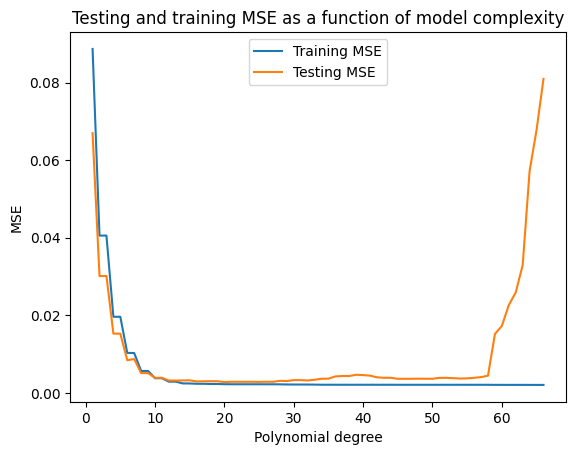

In [4]:
## Figure 2.11 of Hastie et al. 

max_degree = 66

resampling_methods = ResamplingMethods(x,y, max_degree=max_degree)
mse_train = resampling_methods.direct_mse(test_data = False)

resampling_methods = ResamplingMethods(x,y, max_degree=max_degree)
mse_test = resampling_methods.direct_mse(test_data = True)

plt.plot(range(1,max_degree+1), mse_train,label="Training MSE")
plt.plot(range(1,max_degree+1), mse_test,label="Testing MSE")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.title("Testing and training MSE as a function of model complexity")
plt.show()

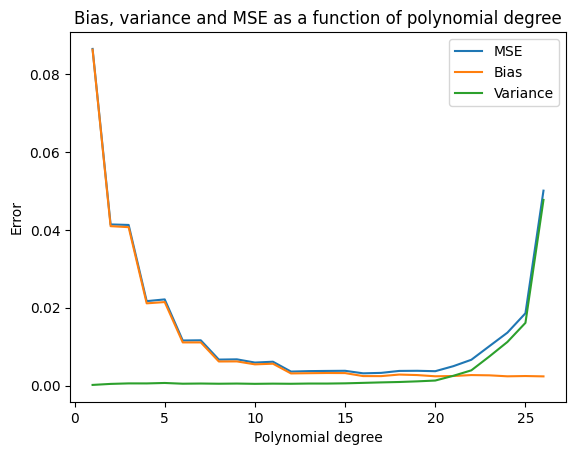

In [5]:
# Bias-variance tradeoff for different numbers of datapoints and training and testing data

# To get values that matches results in the report, you need to run all cells in order. This is to reset the numpy random seed value.

n = 400
x = np.random.uniform(-1, 1, n)
y = runge(x) + 0.05*np.random.normal(0, 1, n)

max_degree = 26
resampling_methods = ResamplingMethods(x,y, max_degree=max_degree,random_state=40)

mse, bias, variance = resampling_methods.bootstrap(n_bootstraps = 500)

plt.plot(range(1, max_degree+1), mse, label="MSE")
plt.plot(range(1, max_degree+1), bias, label="Bias")
plt.plot(range(1, max_degree+1), variance, label="Variance")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.title("Bias, variance and MSE as a function of polynomial degree")
plt.legend()
plt.show()

Table of polynomial degrees where the variance (and bias) is at the minimum

n, random_state         40         44      48

300                     10-16    10-16     8-30

400                    12-20     12-15     10-17

500                    12-60     10-32     10-23